In [96]:
# https://www.kaggle.com/nolanbconaway/pitchfork-data

# scrape from genius
# https://chrishyland.github.io/scraping-from-genius/
# https://medium.com/analytics-vidhya/how-to-scrape-song-lyrics-a-gentle-python-tutorial-5b1d4ab351d2
import sqlite3
import pandas as pd

# import data
con = sqlite3.connect('pitchfork.sqlite')
genres = pd.read_sql('SELECT * FROM genres', con)
artists = pd.read_sql('SELECT * FROM artists', con)
con.close()

genre_classes = genres['genre'].unique()
genre_classes = ['None' if v is None else v for v in genre_classes]
    
# combine genres and artists 
data = pd.merge(genres, artists, on = 'reviewid')    

# remove 'various artists'
data = data[data.artist != 'various artists']

# remove None genre
data = data.dropna()

print()
print(data)

df_train = data[0:15000]
df_test = data[15000:len(data)]


       reviewid         genre          artist
0         22703    electronic  massive attack
1         22721         metal        krallice
2         22659          rock    uranium club
3         22661          rock         kleenex
4         22661          rock         liliput
...         ...           ...             ...
23445      1341    electronic         cassius
23446      5376          rock        mojave 3
23447      2413          rock   don caballero
23448      2413         metal   don caballero
23449      2413  experimental   don caballero

[21062 rows x 3 columns]


In [94]:
# classifier (genre based on artist name)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

pipe = Pipeline([('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])
pipe.fit(df_train['artist'], df_train['genre'])
print(classification_report(y_true = df_test['genre'], y_pred=pipe.predict(df_test['artist'])))

              precision    recall  f1-score   support

  electronic       0.56      0.36      0.44      1183
experimental       0.67      0.15      0.25       611
folk/country       0.87      0.22      0.35       184
      global       1.00      0.07      0.14        54
        jazz       0.71      0.02      0.04       226
       metal       0.80      0.03      0.06       247
     pop/r&b       0.54      0.13      0.21       295
         rap       0.71      0.36      0.47       321
        rock       0.57      0.94      0.71      2941

    accuracy                           0.58      6062
   macro avg       0.72      0.25      0.30      6062
weighted avg       0.61      0.58      0.51      6062



AxesSubplot(0.125,0.125;0.775x0.755)


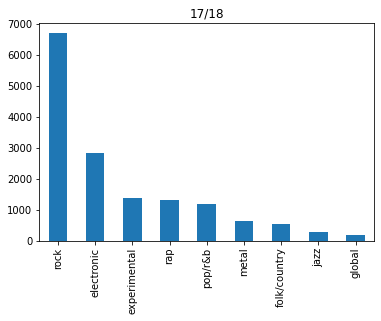

In [95]:
import matplotlib.pyplot as plt

print(df_train['genre'].value_counts().plot(kind="bar", title="17/18"))
